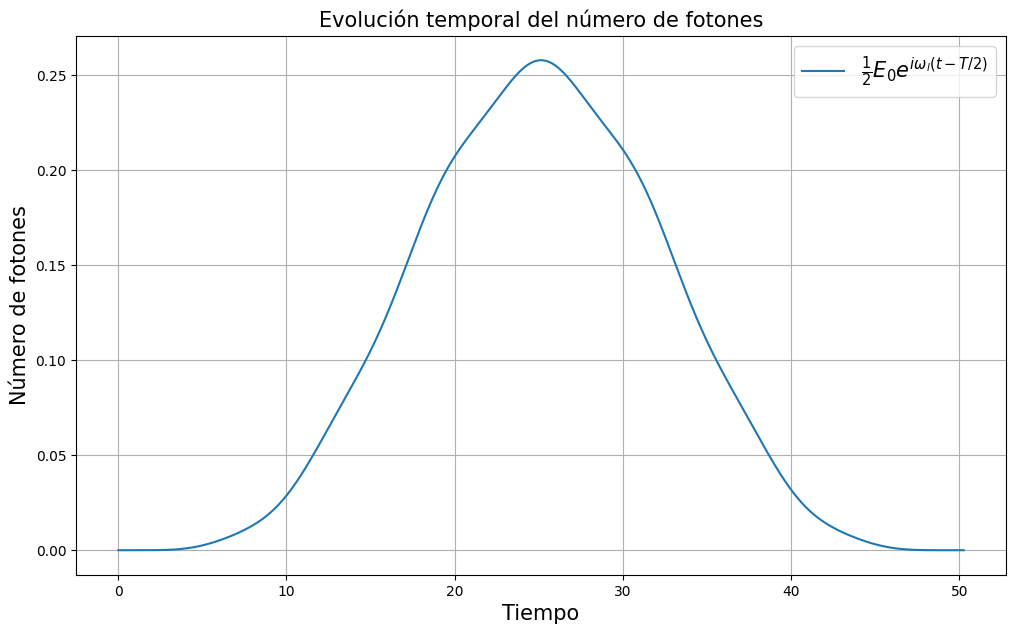

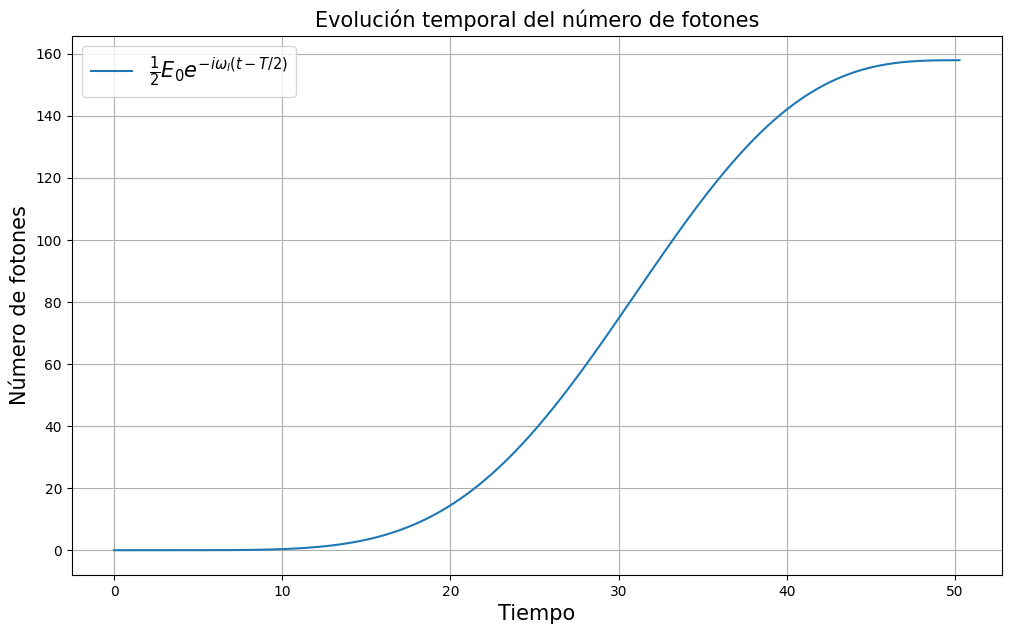

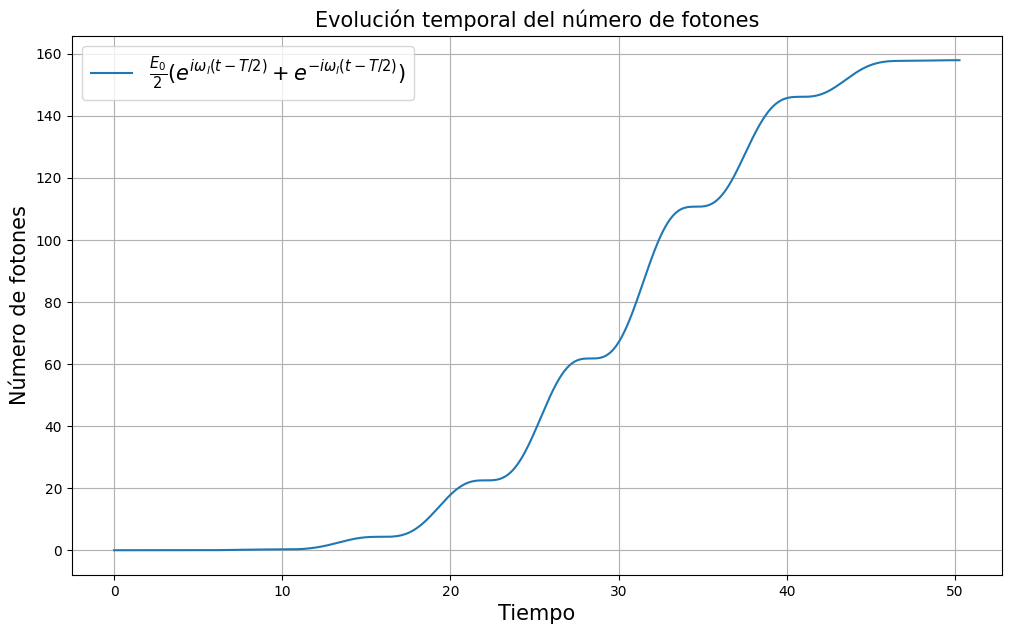

In [1]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy import *

# Definimos las constantes necesarias
hbar = 1.0
omega_l = 0.5
omega_r = 0.5
omega_0 = 0.5
mu=0.5
E0=1
T=8*np.pi*2


# Definimos el tiempo discreto
num_steps = 1000
t = np.linspace(0, T, num_steps)

# Definimos la funcion que nos da el pulso
def pulso(t, args):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso2(t): #Sin aproximación de onda rotante para dibujar
    return E0* np.cos(omega_l * (t-T/2))

#Definamos un puso de onda plana
def pulso_plano(t,args):
    return E0*np.cos(omega_l * (t-T/2))

def pulso_plano1(t,args):
    return E0*(np.sin(np.pi*t/T)**2) *np.exp(1j*omega_l*(t-T/2))/2

#Ahora con argumento negativo
def pulso_plano2(t,args):
    return E0*(np.sin(np.pi*t/T)**2) *np.exp(-1j*omega_l*(t-T/2))/2

def pulso_plano3(t,args):
    return E0*(np.sin(np.pi*t/T)**2)*(np.exp(1j*omega_l*(t-T/2))+np.exp(-1j*omega_l*(t-T/2)))/2

N1 = 700
a = destroy(N1)
ad = create(N1)

# Definimos el Hamiltoniano cero atómico con sigma_z como operador de Pauli
H0 = (ad*a+0.5)*omega_0


# Definimos el operador ( sigma_+ + sigma_- )
HI = (a + ad)
HI1= a
HI2=ad

#Definamos el hamiltoniano total
H1 = [H0, [HI2, pulso_plano1], [HI1, pulso_plano2]]
H2 = [H0, [HI1, pulso_plano1], [HI2, pulso_plano2]]
H3 = [H0, [HI, pulso_plano3]]

# Definimos el estado inicial
psi0 = basis(N1, 0)
psi01=basis(N1,100)

# Calculamos la evolucion temporal
result=mesolve(H1,psi0,t,[],[ad*a])
result1 = mesolve(H2, psi0, t, [], [ad*a])
result2 = mesolve(H3, psi0, t, [], [ad*a])


# Graficamos el resultado

plt.figure(figsize=(12,7))
plt.plot(t, result.expect[0], label=r'$\frac{1}{2}E_{0} e^{i \omega_{l}(t-T/2)}$')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.title('Evolución temporal del número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

plt.figure(figsize=(12,7))
plt.plot(t, result1.expect[0], label=r'$\frac{1}{2}E_{0} e^{-i \omega_{l}(t-T/2)}$')
plt.title('Evolución temporal del número de fotones', fontsize=15)
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

plt.figure(figsize=(12,7))
plt.plot(t,result2.expect[0], label=r'$\frac{E_{0}}{2} (e^{i \omega_{l}(t-T/2)}+e^{-i \omega_{l}(t-T/2)})$')
plt.title('Evolución temporal del número de fotones', fontsize=15)
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()







In [10]:
#Revival time

def revival(alpha,g):
    return (2*np.pi)/(2*g*(np.sqrt(alpha+2)-np.sqrt(alpha+1)))

revival(3.7413,0.01)

1436.8242515181796

In [2]:
a=44444.33333
np.round(a,2)

44444.33

In [3]:

b=tensor(coherent(50,np.sqrt(4.741170512208291)),basis(2,1))
b

Quantum object: dims = [[50, 2], [1, 1]], shape = (100, 1), type = ket
Qobj data =
[[0.00000000e+00]
 [9.34260321e-02]
 [0.00000000e+00]
 [2.03427982e-01]
 [0.00000000e+00]
 [3.13212064e-01]
 [0.00000000e+00]
 [3.93750067e-01]
 [0.00000000e+00]
 [4.28680208e-01]
 [0.00000000e+00]
 [4.17437267e-01]
 [0.00000000e+00]
 [3.71072167e-01]
 [0.00000000e+00]
 [3.05388126e-01]
 [0.00000000e+00]
 [2.35098545e-01]
 [0.00000000e+00]
 [1.70636319e-01]
 [0.00000000e+00]
 [1.17493614e-01]
 [0.00000000e+00]
 [7.71366379e-02]
 [0.00000000e+00]
 [4.84856107e-02]
 [0.00000000e+00]
 [2.92808703e-02]
 [0.00000000e+00]
 [1.70397316e-02]
 [0.00000000e+00]
 [9.57987646e-03]
 [0.00000000e+00]
 [5.21486061e-03]
 [0.00000000e+00]
 [2.75398158e-03]
 [0.00000000e+00]
 [1.41340807e-03]
 [0.00000000e+00]
 [7.06046904e-04]
 [0.00000000e+00]
 [3.43764751e-04]
 [0.00000000e+00]
 [1.63340726e-04]
 [0.00000000e+00]
 [7.58273588e-05]
 [0.00000000e+00]
 [3.44274454e-05]
 [0.00000000e+00]
 [1.53017804e-05]
 [0.00000000e+00]

In [4]:
b=tensor(coherent(5,np.sqrt(4.741170512208291)),basis(2,1)).unit()
b.norm()

1.0

In [5]:
b=coherent(50,157)
Qobj(b,dims=[[N1,2],[N1,2]])


Quantum object: dims = [[700, 2], [700, 2]], shape = (50, 1), type = oper, isherm = False
Qobj data =
[[-6.71157598e-01]
 [-4.70699756e-01]
 [-4.19361435e-01]
 [-2.77454823e-01]
 [-1.79045077e-01]
 [-7.53113729e-02]
 [-5.05325948e-03]
 [ 4.85439680e-02]
 [ 7.65235131e-02]
 [ 8.84067830e-02]
 [ 8.28595259e-02]
 [ 6.95729861e-02]
 [ 4.99562012e-02]
 [ 2.77413807e-02]
 [ 8.34671858e-03]
 [-9.32775258e-03]
 [-2.21378934e-02]
 [-2.88805529e-02]
 [-3.33075536e-02]
 [-3.05997858e-02]
 [-2.72781393e-02]
 [-2.05570833e-02]
 [-1.22063688e-02]
 [-6.18210002e-03]
 [ 2.98283716e-03]
 [ 6.50220364e-03]
 [ 1.23785666e-02]
 [ 1.39186499e-02]
 [ 1.43164635e-02]
 [ 1.50236285e-02]
 [ 1.05127123e-02]
 [ 1.08722834e-02]
 [ 4.22840845e-03]
 [ 3.84619480e-03]
 [-1.47909616e-03]
 [-3.28570748e-03]
 [-4.80438916e-03]
 [-8.23981422e-03]
 [-5.41669524e-03]
 [-9.79766307e-03]
 [-4.07456677e-03]
 [-7.97189326e-03]
 [-1.98430570e-03]
 [-3.78390246e-03]
 [-2.14362068e-04]
 [ 1.20585855e-03]
 [ 6.53111109e-04]
 [ 5.

In [6]:
print(result)

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 1, num_collapse = 0


In [7]:
from qutip import tensor, destroy, create, qeye

# Definir los operadores
a = tensor(destroy(51), qeye(2))
ad = tensor(create(51), qeye(2))
N = a.dag() * a

# Lista de índices que deseas conservar (por ejemplo, los índices 0, 1 y 2)
indices_a_considerar = [0, 1, 2]

# Obtener las dimensiones de N
dimension = N.shape[2]

# Crear una matriz con ceros
N_submatriz = qeye(dimension)

# Rellenar la submatriz con los elementos correspondientes
for i in indices_a_considerar:
    for j in indices_a_considerar:
        N_submatriz.data[i, j] = N.data[i, j]

# N_submatriz ahora contiene la submatriz de N con los índices especificados
print(N_submatriz)


IndexError: tuple index out of range

In [ ]:
result=mesolve(H1,psi0,t,[],[])
result.states[1]

Quantum object: dims = [[700], [1]], shape = (700, 1), type = ket
Qobj data =
[[ 9.99920888e-01-1.25784424e-02j]
 [-6.18476552e-10-1.26829256e-07j]
 [-4.04918307e-14-1.81047573e-15j]
 [-7.28686115e-23+1.23005651e-21j]
 [ 7.93645180e-30+5.98480747e-31j]
 [ 9.60692655e-47-1.22550569e-45j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.0000000

In [ ]:
identidad= identity(700)
#identidad=qeye(700)
coherente=coherent(700,1)

#Modifiquemos la dimensión de la identidad
#identidad.dims=[[700],[1]]
identidadd=identidad.dag()
#identidad*result.states[1]
coherente.dag()*identidad*coherente 
#identidadd*result.states[1]
#identidad

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

In [ ]:
identidad

Quantum object: dims = [[700], [1]], shape = (700, 700), type = ket
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

In [ ]:
a=np.linspace(0,10,100)
a

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

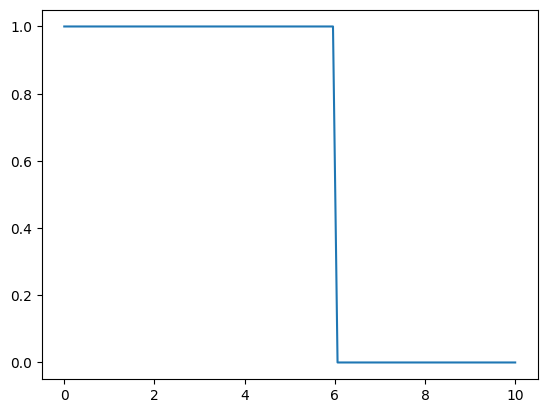

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Quiero que la función heaviside valga 1 entre 4 y 6 y 0 en otro caso
#Usando np.heaviside 
g=1
heaviside = lambda x,g: np.heaviside(x-0,1)-np.heaviside(x-6,1)
x=np.linspace(0,10,100)

plt.plot(x,heaviside(x,g))
plt.show()
#


In [ ]:
248/41

6.048780487804878

In [7]:
#Calculemos elementos de matriz
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from scipy.special import factorial

#Elementos de matriz para l mayor o igual que n
def matrix_element(m,n, alpha):
        n=float(n)
        m=float(m)
        alpha=float(alpha)
        return (alpha**(m-n))*np.sqrt(factorial(n)/factorial(m))*np.exp(-(abs(alpha)**2)/2)*genlaguerre(n,m-n)(abs(alpha)**2)

#Elementos de matriz para l menor que n

def matrix_element2(m,n, alpha):
    n=float(n)
    m=float(m)
    alpha=float(alpha)
    if (n-m)<0:
        print("Error: n debe ser mayor que m")
        print(m, n, n-m)
    return ((-alpha)**(n-m))*np.sqrt(factorial(m)/factorial(n))*np.exp(-(abs(alpha)**2)/2)*genlaguerre(m,n-m)(abs(alpha)**2)

#Elementos de matriz para l mayor o igual que n
def matrix_element(m,n, alpha):
        if m>=n:
            n=float(n)
            m=float(m)
            alpha=float(alpha)
            return (alpha**(m-n))*np.sqrt(factorial(n)/factorial(m))*np.exp(-(abs(alpha)**2)/2)*genlaguerre(n,m-n)(abs(alpha)**2)
        else:
             return ((-alpha)**(n-m))*np.sqrt(factorial(m)/factorial(n))*np.exp(-(abs(alpha)**2)/2)*genlaguerre(m,n-m)(abs(alpha)**2)

#Llenemos una matriz 
np.seterr(all='warn', over='ignore')
N=100
a=0.1
D=np.zeros((N,N))
DT=np.zeros((N,N))

for m in range(N):
    for n in range(N):
        
        D[m,n]=matrix_element(m,n,a)
        DT[m,n]=matrix_element(m,n,-a)
    

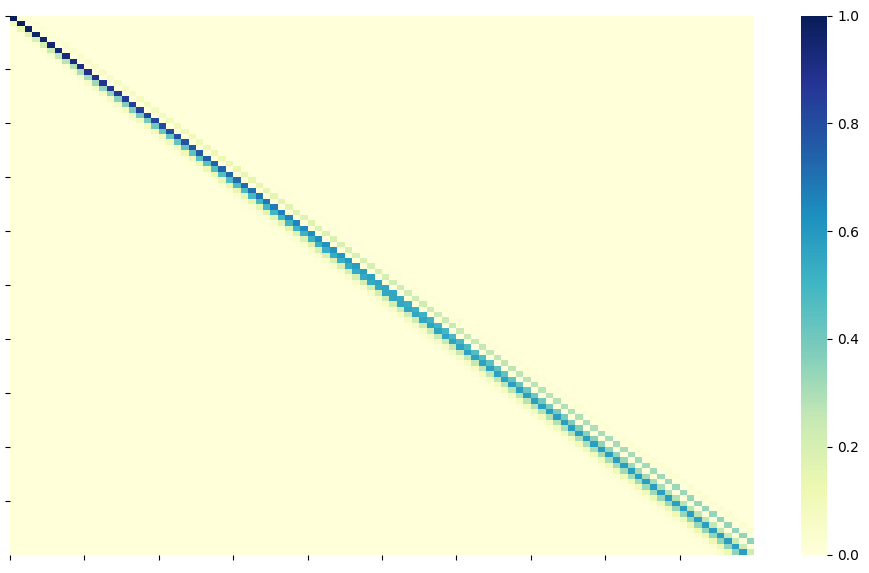

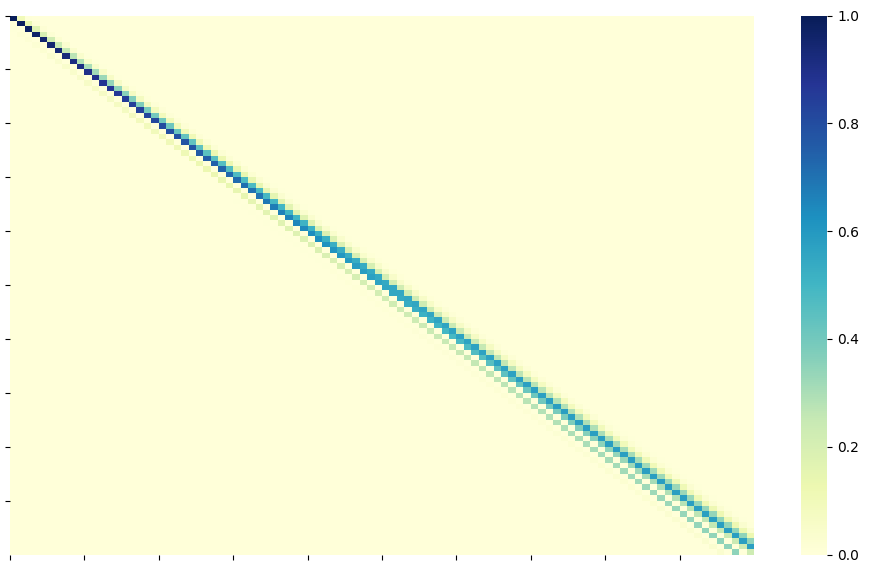

/tmp/ipykernel_8637/2031298571.py:18: RuntimeWarning: underflow encountered in multiply
  sns.heatmap(D*DT,cmap="YlGnBu", vmin=0, vmax=1)


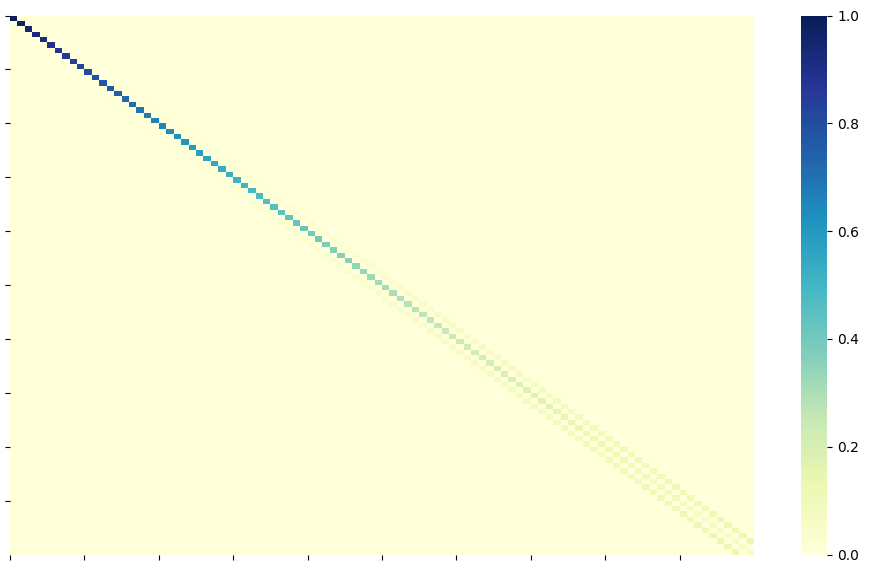

In [8]:
#Mostremos la matriz más linda

import seaborn as sns

plt.figure(figsize=(12,7))
sns.heatmap(D,cmap="YlGnBu", vmin=0, vmax=1)
plt.xticks(np.arange(0, N, 10), fontsize=15)
plt.yticks(np.arange(0, N, 10), fontsize=15)
plt.show()

plt.figure(figsize=(12,7))
sns.heatmap(DT,cmap="YlGnBu", vmin=0, vmax=1)
plt.xticks(np.arange(0, N, 10), fontsize=15)
plt.yticks(np.arange(0, N, 10), fontsize=15)
plt.show()

plt.figure(figsize=(12,7))
sns.heatmap(D*DT,cmap="YlGnBu", vmin=0, vmax=1)
plt.xticks(np.arange(0, N, 10), fontsize=15)
plt.yticks(np.arange(0, N, 10), fontsize=15)
plt.show()



In [11]:
print(D*D)



[[9.90049834e-01 9.90049834e-03 4.95024917e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.90049834e-03 9.70347842e-01 1.96034817e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.95024917e-05 1.96034817e-02 9.50940888e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.68454757e-02
  3.34017759e-01 1.22113294e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.34017759e-01
  5.40956844e-02 3.33337583e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.22113294e-01
  3.33337583e-01 5.14301500e-02]]


/tmp/ipykernel_8637/4020046609.py:1: RuntimeWarning: underflow encountered in multiply
  print(D*D)
